# Model Selection

Now that we've successfully pre-processed the data, we can move to building ML models.

We will use the following models (building multiple models for each with different input variables and parameters):
- **Logistic Regression**
- Decision Tree
- Random Forest
- k-Nearest Neighbor
- Support Vector Machine (SVM)
- Naive Bayes
- Neural Network
- Linear Perceptron
- Gradient Boosting Machines

### Logistic Regression

We will create different Logistic Regression models based on the following parameters:
- Different dataset combinations:
    - Numeric
    - Binary
    - Categorical
    - Numeric + Binary
    - Numeric + Categorical
    - Binary + Categorical
    - Numeric + Binary + Categorical
- Penalty:
    - None
    - Ridge (l2)
- Fit_intercept:
    - True (Include Intercept Term)
    - False (Don't Include Intercept Term)
- Class_weight:
    - None
    - Balanced
    
We will evaluate these models based on:
- 2x2 Confusion Matrix
- Precision, Recall, F-1 Score
- ROC Curve
- Precision-Recall Curve

Note: We will not use a simple accuracy score due to our dataset being dominated by roughly 90% of non-default data

#### Different Datasets

To start, we will examine the performance of the different datasets using these basic parameters:
- penalty = None
- fit_intercept = True
- class_weight = Balanced

From here, we can then pick the ones that work the best before optimizing the additional parameters (this saves us time and notebook space).

In [47]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix, 
                             classification_report,
                             precision_recall_curve,
                             average_precision_score,
                             roc_curve,
                             roc_auc_score,
                             log_loss)

In [48]:
df_auto_loan_numeric_std = pd.read_csv('df_auto_loan_numeric_std.csv').set_index('ID')
df_auto_loan_binary = pd.read_csv('df_auto_loan_binary.csv').set_index('ID')
df_auto_loan_categorical = pd.read_csv('df_auto_loan_categorical.csv').set_index('ID')
df_auto_loan_numeric_binary_std = pd.read_csv('df_auto_loan_numeric_binary_std.csv').set_index('ID')
df_auto_loan_numeric_categorical_std = pd.read_csv('df_auto_loan_numeric_categorical_std.csv').set_index('ID')
df_auto_loan_binary_categorical = pd.read_csv('df_auto_loan_binary_categorical.csv').set_index('ID')
df_auto_loan_numeric_binary_categorical_std = pd.read_csv('df_auto_loan_numeric_binary_categorical_std.csv').set_index('ID')




In [49]:
df_dict = {'Numeric': df_auto_loan_numeric_std, 
           'Binary': df_auto_loan_binary,
           'Categorical': df_auto_loan_categorical,
           'Numeric + Binary': df_auto_loan_numeric_binary_std,
           'Numeric + Categorical': df_auto_loan_numeric_categorical_std,
           'Binary + Categorical': df_auto_loan_binary_categorical,
           'Numeric + Binary + Categorical': df_auto_loan_numeric_binary_categorical_std}

Numeric
LogisticRegression(penalty=None,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.49      0.64     17823
           1       0.10      0.65      0.18      1617

    accuracy                           0.50     19440
   macro avg       0.52      0.57      0.41     19440
weighted avg       0.87      0.50      0.60     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


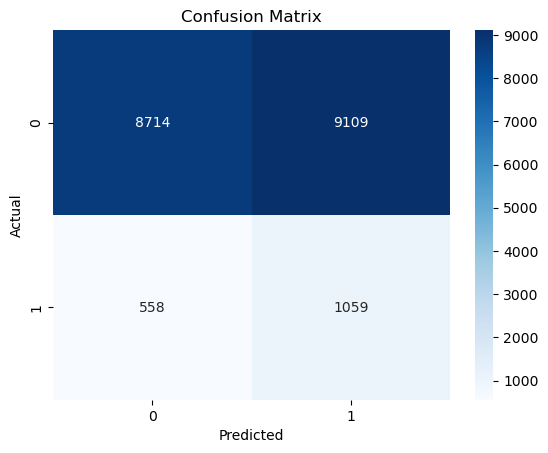

Binary
LogisticRegression(penalty=None,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.93      0.45      0.61     17766
           1       0.10      0.63      0.17      1674

    accuracy                           0.47     19440
   macro avg       0.51      0.54      0.39     19440
weighted avg       0.86      0.47      0.57     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


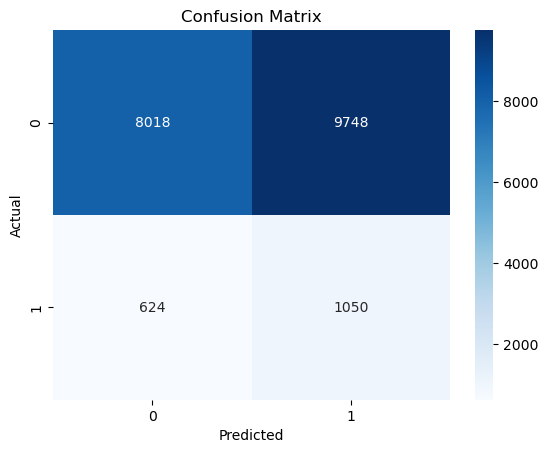

Categorical
LogisticRegression(penalty=None,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.50      0.65     17789
           1       0.10      0.64      0.18      1651

    accuracy                           0.51     19440
   macro avg       0.52      0.57      0.41     19440
weighted avg       0.87      0.51      0.61     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


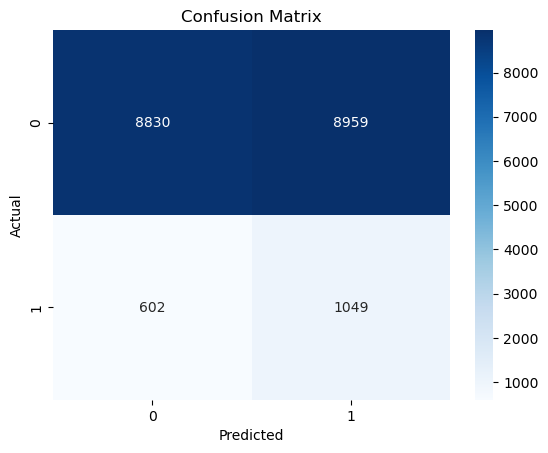

Numeric + Binary
LogisticRegression(penalty=None,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.53      0.67     17756
           1       0.11      0.64      0.19      1684

    accuracy                           0.54     19440
   macro avg       0.53      0.58      0.43     19440
weighted avg       0.87      0.54      0.63     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


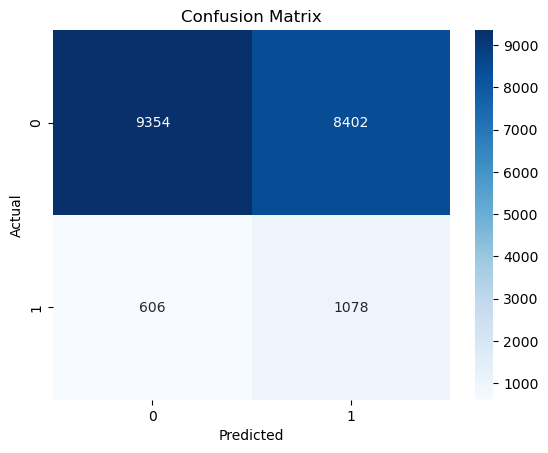

Numeric + Categorical
LogisticRegression(penalty=None,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.53      0.68     17744
           1       0.12      0.66      0.20      1696

    accuracy                           0.54     19440
   macro avg       0.53      0.59      0.44     19440
weighted avg       0.87      0.54      0.64     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


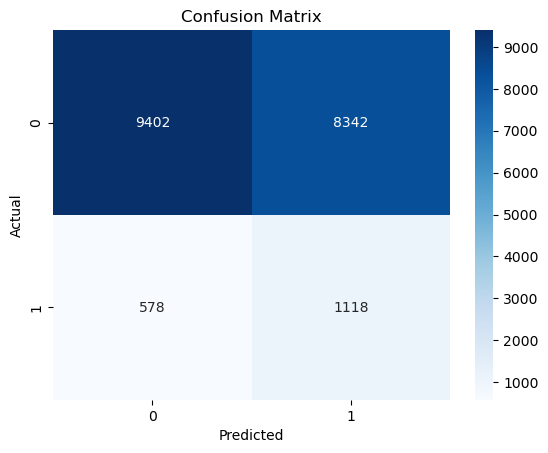

Binary + Categorical
LogisticRegression(penalty=None,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.48      0.63     17820
           1       0.10      0.67      0.18      1620

    accuracy                           0.49     19440
   macro avg       0.52      0.57      0.41     19440
weighted avg       0.87      0.49      0.60     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


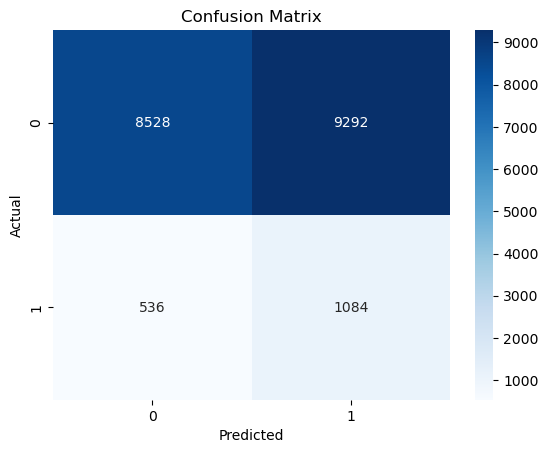

Numeric + Binary + Categorical
LogisticRegression(penalty=None,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.95      0.56      0.70     17791
           1       0.12      0.66      0.20      1649

    accuracy                           0.56     19440
   macro avg       0.53      0.61      0.45     19440
weighted avg       0.88      0.56      0.66     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


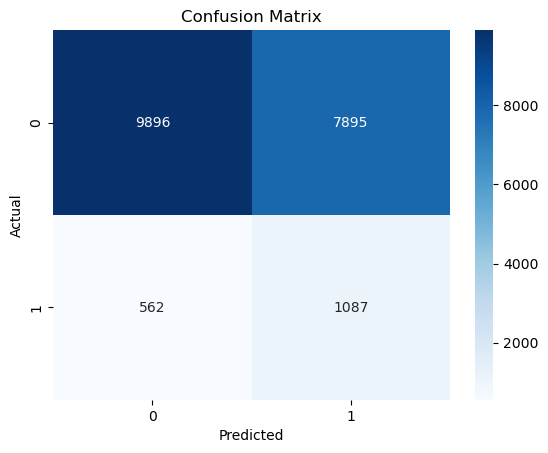

In [50]:
for df_name, df in df_dict.items():
    print(df_name)
    X_data = df.loc[:,[col for col in df.columns if col != 'Default']].values
    y_data = df.loc[:, 'Default'].values.astype(int)
    
    for penalty in [None]:#, 'l1', 'l2'], 'elasticnet']:
        for fit_intercept in [True]:#, False]:
            for class_weight in ['balanced']:#, None]:
                for max_iter in [1000]:# [100, 1000, 10000, 100000]:
                    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                                        y_data,
                                                                        test_size=0.3)
                    logistic_regression_model = LogisticRegression(penalty=penalty,
                                                                   fit_intercept=fit_intercept,
                                                                   class_weight=class_weight,
                                                                   max_iter=max_iter,
                                                                   l1_ratio=0.5)
                    print(f'LogisticRegression(penalty={penalty},fit_intercept={fit_intercept},class_weight={class_weight},max_iter={max_iter})')
                    logistic_regression_model.fit(X_train, y_train)
                    y_pred = logistic_regression_model.predict(X_test)
    
                    print(classification_report(y_test, y_pred))
        
                    cm = confusion_matrix(y_test, y_pred)
                    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
                    plt.xlabel('Predicted')
                    plt.ylabel('Actual')
                    plt.title('Confusion Matrix')
                    plt.show()

#### Different Datasets Reflection

We can see that while the performance across all of the datasets is about the same, with the following approximate values:
- Precision = ~12%
- Recall = ~65%
- f1-score = ~19%

Moving forward, we will continue to use only the 'Numeric + Binary + Categorical' dataset since this includes all of the selected data.

#### Additional Parameter Optimization

Now, we will experiment with different values for the additional parameters:
- Class_Weight
- Fit_Intercept
- Penalty

In [51]:
df_dict = {'Numeric + Binary + Categorical': df_auto_loan_numeric_binary_categorical_std}

###### Class_Weight

As demonstrated in the below code, we can see that a class_weight=None makes it virtually impossible to correctly predict (default=1) values. So, we will proceed with using class_weight='balanced'

Numeric + Binary + Categorical
LogisticRegression(penalty=None,fit_intercept=True,class_weight=None,max_iter=1000)


/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      1.00      0.96     17770
           1       0.00      0.00      0.00      1670

    accuracy                           0.91     19440
   macro avg       0.46      0.50      0.48     19440
weighted avg       0.84      0.91      0.87     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


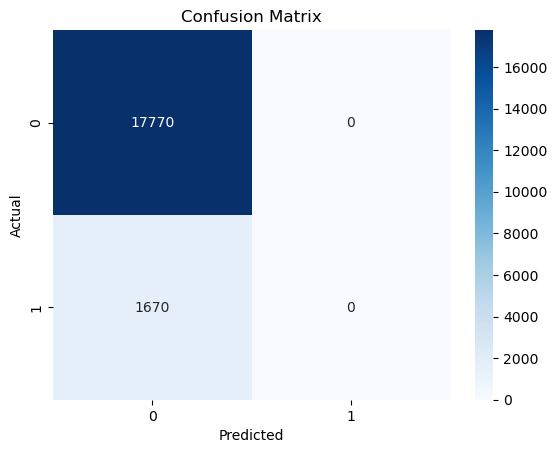

/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


LogisticRegression(penalty=None,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.55      0.69     17754
           1       0.12      0.66      0.21      1686

    accuracy                           0.56     19440
   macro avg       0.53      0.61      0.45     19440
weighted avg       0.87      0.56      0.65     19440



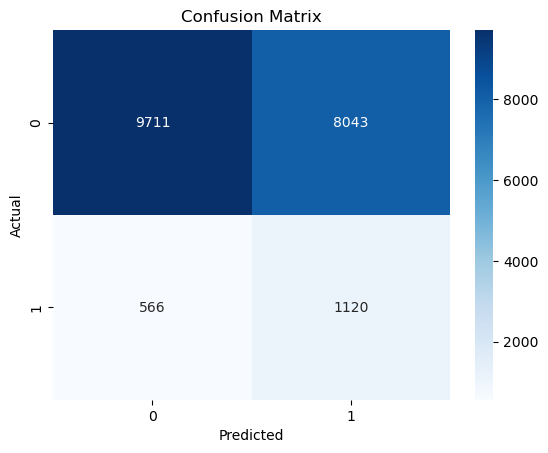

In [52]:
for df_name, df in df_dict.items():
    print(df_name)
    X_data = df.loc[:,[col for col in df.columns if col != 'Default']].values
    y_data = df.loc[:, 'Default'].values.astype(int)
    
    for penalty in [None]:
        for fit_intercept in [True]:
            for class_weight in [None, 'balanced']:
                for max_iter in [1000]:
                    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                                        y_data,
                                                                        test_size=0.3)
                    logistic_regression_model = LogisticRegression(penalty=penalty,
                                                                   fit_intercept=fit_intercept,
                                                                   class_weight=class_weight,
                                                                   max_iter=max_iter,
                                                                   solver='saga',
                                                                   l1_ratio=0.5)
                    print(f'LogisticRegression(penalty={penalty},fit_intercept={fit_intercept},class_weight={class_weight},max_iter={max_iter})')
                    logistic_regression_model.fit(X_train, y_train)
                    y_pred = logistic_regression_model.predict(X_test)
    
                    print(classification_report(y_test, y_pred))
        
                    cm = confusion_matrix(y_test, y_pred)
                    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
                    plt.xlabel('Predicted')
                    plt.ylabel('Actual')
                    plt.title('Confusion Matrix')
                    plt.show()

###### Fit_Intercept

As demonstrated in the below code, we can see that the fit_intercept parameter doesn't cause a significant change in performance.

Moving forward, we will continue to use fit_intercept=True

Numeric + Binary + Categorical
LogisticRegression(penalty=None,fit_intercept=False,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.53      0.68     17698
           1       0.12      0.66      0.21      1742

    accuracy                           0.54     19440
   macro avg       0.53      0.60      0.44     19440
weighted avg       0.87      0.54      0.64     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


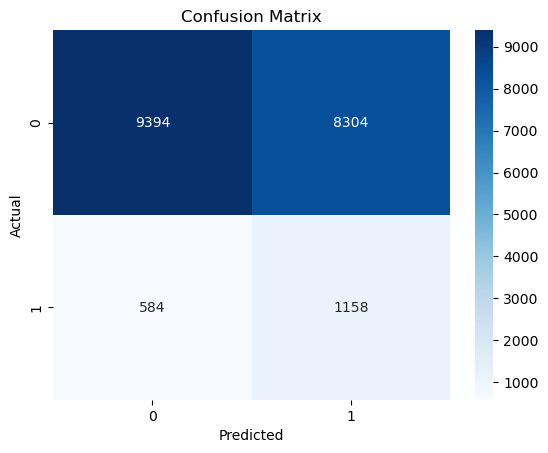

LogisticRegression(penalty=None,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.55      0.69     17711
           1       0.13      0.66      0.21      1729

    accuracy                           0.56     19440
   macro avg       0.53      0.61      0.45     19440
weighted avg       0.87      0.56      0.65     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


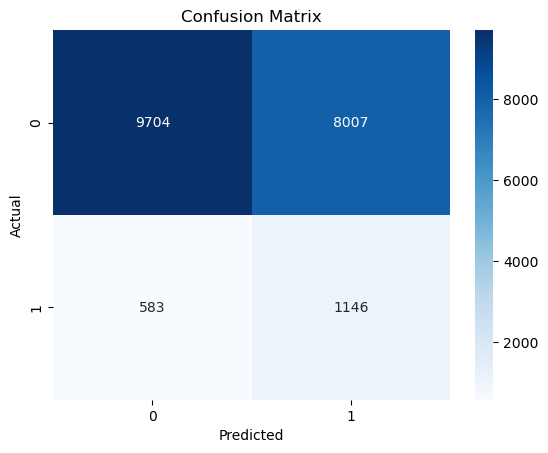

In [53]:
for df_name, df in df_dict.items():
    print(df_name)
    X_data = df.loc[:,[col for col in df.columns if col != 'Default']].values
    y_data = df.loc[:, 'Default'].values.astype(int)
    
    for penalty in [None]:
        for fit_intercept in [False, True]:
            for class_weight in ['balanced']:
                for max_iter in [1000]:
                    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                                        y_data,
                                                                        test_size=0.3)
                    logistic_regression_model = LogisticRegression(penalty=penalty,
                                                                   fit_intercept=fit_intercept,
                                                                   class_weight=class_weight,
                                                                   max_iter=max_iter,
#                                                                    solver='saga',
                                                                   l1_ratio=0.5)
                    print(f'LogisticRegression(penalty={penalty},fit_intercept={fit_intercept},class_weight={class_weight},max_iter={max_iter})')
                    logistic_regression_model.fit(X_train, y_train)
                    y_pred = logistic_regression_model.predict(X_test)
    
                    print(classification_report(y_test, y_pred))
        
                    cm = confusion_matrix(y_test, y_pred)
                    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
                    plt.xlabel('Predicted')
                    plt.ylabel('Actual')
                    plt.title('Confusion Matrix')
                    plt.show()

###### Penalty

As demonstrated in the below code, we can see that the penalty term has no significant impact on the performance of the model.

Moving forward, we will continue to use penalty='l2' (Ridge)

Numeric + Binary + Categorical
LogisticRegression(penalty=None,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.55      0.70     17728
           1       0.12      0.66      0.21      1712

    accuracy                           0.56     19440
   macro avg       0.53      0.61      0.45     19440
weighted avg       0.87      0.56      0.66     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


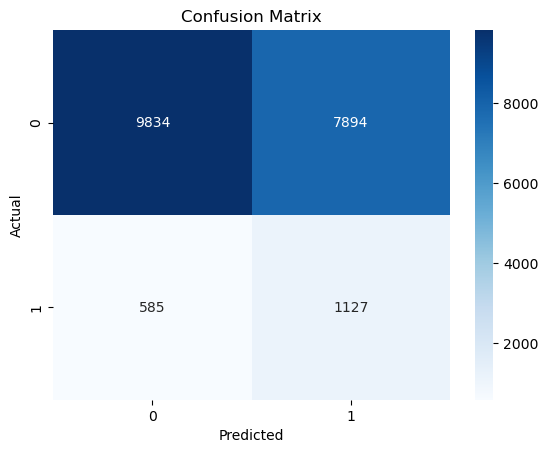

LogisticRegression(penalty=l2,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.55      0.69     17742
           1       0.12      0.65      0.20      1698

    accuracy                           0.55     19440
   macro avg       0.53      0.60      0.45     19440
weighted avg       0.87      0.55      0.65     19440



/Users/suhaib/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


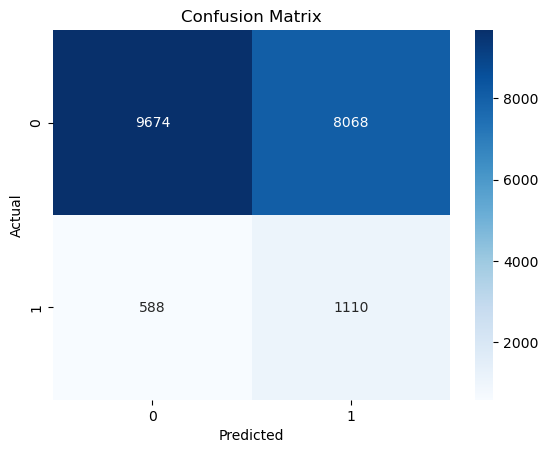

In [54]:
for df_name, df in df_dict.items():
    print(df_name)
    X_data = df.loc[:,[col for col in df.columns if col != 'Default']].values
    y_data = df.loc[:, 'Default'].values.astype(int)
    
    for penalty in [None, 'l2']:
        for fit_intercept in [True]:
            for class_weight in ['balanced']:
                for max_iter in [1000]:
                    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                                        y_data,
                                                                        test_size=0.3)
                    logistic_regression_model = LogisticRegression(penalty=penalty,
                                                                   fit_intercept=fit_intercept,
                                                                   class_weight=class_weight,
                                                                   max_iter=max_iter,
#                                                                    solver='saga',
                                                                   l1_ratio=0.5)
                    print(f'LogisticRegression(penalty={penalty},fit_intercept={fit_intercept},class_weight={class_weight},max_iter={max_iter})')
                    logistic_regression_model.fit(X_train, y_train)
                    y_pred = logistic_regression_model.predict(X_test)
    
                    print(classification_report(y_test, y_pred))
        
                    cm = confusion_matrix(y_test, y_pred)
                    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
                    plt.xlabel('Predicted')
                    plt.ylabel('Actual')
                    plt.title('Confusion Matrix')
                    plt.show()

#### Optimal Logistic Regression Model

We will build our optimal logistic regression model using:
- Dataset: Full (Numeric + Binary + Categorical)
- Penalty: l2 (Ridge)
- Fit_Intercept: True
- Class_Weight: Balanced

LogisticRegression(penalty=l2,fit_intercept=True,class_weight=balanced,max_iter=1000)
              precision    recall  f1-score   support

           0       0.94      0.55      0.69     17728
           1       0.12      0.65      0.21      1712

    accuracy                           0.56     19440
   macro avg       0.53      0.60      0.45     19440
weighted avg       0.87      0.56      0.65     19440



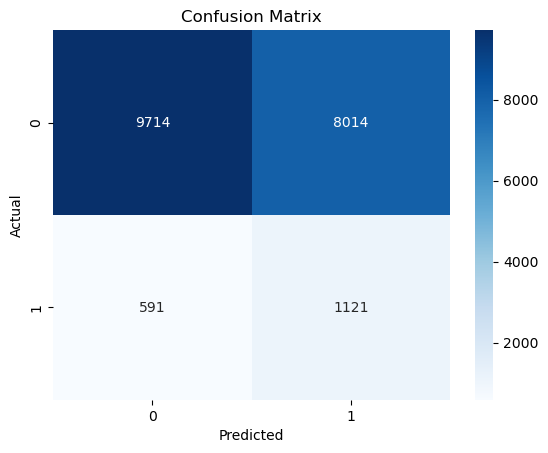

/var/folders/w5/srvyynsx0xl0xdcy3blxc3800000gp/T/ipykernel_95458/2775684747.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


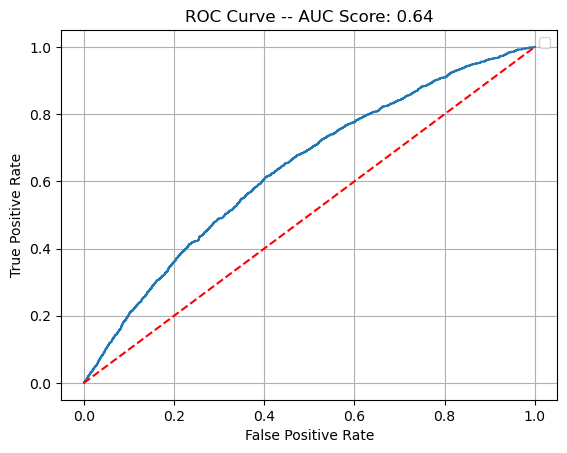

/var/folders/w5/srvyynsx0xl0xdcy3blxc3800000gp/T/ipykernel_95458/2775684747.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.linspace(0, 1, 10000), [y_test.mean()] * 10000, 'k--', color='red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


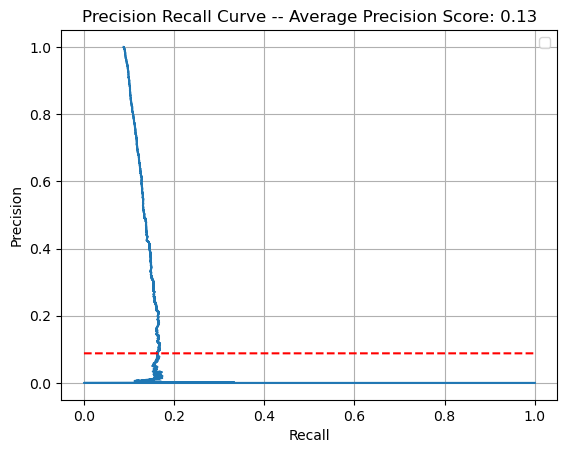

In [55]:
df = df_auto_loan_numeric_binary_categorical_std
penalty = 'l2'
fit_intercept = True
class_weight = 'balanced'
max_iter = 1000


X_data = df.loc[:,[col for col in df.columns if col != 'Default']].values
y_data = df.loc[:, 'Default'].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.3)
logistic_regression_model = LogisticRegression(penalty=penalty,
                                                fit_intercept=fit_intercept,
                                                class_weight=class_weight,
                                                max_iter=max_iter)
print(f'LogisticRegression(penalty={penalty},fit_intercept={fit_intercept},class_weight={class_weight},max_iter={max_iter})')
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
    
print(classification_report(y_test, y_pred))

#Optimal Model Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

y_pred_proba_d1 = logistic_regression_model.predict_proba(X_test)[:, 1]

#Optimal Model ROC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba_d1)
auc_score = roc_auc_score(y_test, y_pred_proba_d1)
plt.figure()
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], 'k--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve -- AUC Score: {round(auc_score, 2)}')
plt.grid(True)
plt.legend()
plt.show()


#Optimal Model Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_d1)
ap_score = average_precision_score(y_test, y_pred_proba_d1)
plt.figure()
plt.plot(precision, recall)
plt.plot(np.linspace(0, 1, 10000), [y_test.mean()] * 10000, 'k--', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision Recall Curve -- Average Precision Score: {round(ap_score, 2)}')
plt.grid(True)
plt.legend()
plt.show()


### Reflection

While our ROC curve shows some signs of promise, our imbalanced dataset (90% (default=0), 10% (default=1)) may be the cause for this. Our low f1-score and erratic precision-recall curve shows that we should consider additional models.